# Introduction to Systems Biology Modeling

Author: Charles Tapley Hoyt

Institution: B-IT, University of Bonn

Semester: Winter 2016


## Introduction

Biological expression language (BEL) is an exceptional framework for representing the causal interactions between molecular entities. It can also represent the interactions between molecular entities and higher level biological processes, transformations, and pathologies. However, encoding literature in BEL requires exceptional effort.

The Introduction to Systems Biology Modeling Lab 2016 in B-IT attempted to educate a group of about 20 students in four hour-long sessions on the merits of machine-readable knowledge and training on encoding in BEL. After, they were given 16 articles each related to the research on neuroinflammation.

Without guidance, students developed a wide variety of coding styles. Each student was solely responsible for their articles, and never collaborated with others. This made it difficult to find systematic errors in logic, typos, and other semantic errors. 

## Problems with BEL Curation

The introduction of PyBEL compiler makes the compilation of a BEL document much faster than the OpenBEL Framework - less than 30 seconds versus over 5 minutes, but the proper public release of this software happened after the in-class time devoted to the lab was over and it was not possible to make a demonstration. With this tool, students could have more easily checked their mistakes and made improvements. Among the common errors were: 

### Semantically invalid use of identifiers in the incorrect BEL function, such as calling a gene the same as protein

Invalid semantic usages of names were difficult to catch because at the time, neither the OpenBEL Framework nor the PyBEL compilers made error messages for improper semantic use of identifiers. Additionally, the difference between a gene/RNA/protein or a biological process/pathology is not always clear. 


### Improper improper names within namespaces due to typos and blatant disregard for the controlled namespace

The second issue is understandable - reading through the biological text is incredibly difficult and taxing. It’s easily possible to lose focus or get lazy. This could be addressed by providing a rich set of tools to help curators look up the terms they encounter within an article. This is difficult to provide because the OpenBEL *.BELNS and *.BELANNO files are flat terminologies that provide no context, explanation, or synonyms for each term. This should motivate the use of much more rich and hierarchical ontologies. Luckily, many of the *.BELNS and *.BELANNO files are created through the systematic parsing and re-serialization of existing terminologies, hierarchies, and ontologies from external sources. In the future, BEL should provide the option to use external ontologies produced in formats like OWL, produced with standards from popular programs like Protége to define namespaces and annotations. Additionally, this can leverage the powerful text-mining capabilities of groups that are doing a significant amount of knowledge model-building with BEL. Further, the use semi-automatic curation practices (such as BELIEF) can make the identification of terms and their appropriate namespaces and functions more trivial.

### Omission of namespace (naked name) when it was difficult or impossible to find the appropriate identifier

Addressing the issue of finding the appropriate names for statements identified in a text is non-trivial. As an example, a meeting I attended between curators, managers of curators, disease experts, BEL language experts, and graph mining experts proposed multiple different ways to represent Beta Amyloid Peptides, a term that occurs very frequently in literature related to Alzheimer’s Disease. This list included the following representations:

- original naked name,  a("amyloid beta peptides")
- reference to truncated protein in Alzheimer Disease Ontology, a(ADO:Abeta_42)
- collection of proteins, p(HGNC:APP, trunc(42)) and p(HGNC:APP, trunc(40))
- biological process, bp(GOBP:"formation of amyloid beta peptides")


Unfortunately, there are many terms with this kind of ambiguity. It would require a large, concerted effort to identify the terms that are relevant to a disease. However, this is the original goal of the development of an ontology. The Alzheimer’s and Parkinson’s Disease Ontologies, available publicly through BioPortal, are severely lacking and development has been abandoned. These ontologies should be updated by a committee of curators, who are aware of the many phrases used throughout literature related to the disease area, and disease experts, who can provide context and allow for development of thorough ontologies. This process should be performed for all of the genes, RNA, proteins, biological processes, and pathologies. Hierarchies can be developed to make more specific statements that do not conflict with current terminologies, but instead make them more rich, and can be reasoned over during analysis. For example, this is a short list of the phrases I found in relation to Parkinson’s disease in my corpus, that did not have any associated terms in PDO, MeSH Diseases, or GO Biological Processes:
alpha-Syn-KO, beta-Syn-KO, gamma-Syn-KO, and triple-KO mice (annotations for species)
toxic seeding (annotations for biological process)
alpha-synuclein pathology (hierarchical namespaces for pathology)
general definitions of toxicity (biological process)
formation of Lewy bodies and related terminology (biological process, abundance)
incidental Lewy body disease (pathology needs hierarchy)


In particular, one of the shortcomings of the Parkinson’s Disease Ontology is the poor annotations added to each term. While there is a section on mouse models, they use arcane nomenclature, provide no description, no references or examples, and no synonyms. There is huge potential for doing better curation and producing more reliable networks with the active development of a proper terminology for a given disease indication. Text mining also benefits from proper ontologies, and can further improve the semi-automatic curation pipeline.


For somebody unfamiliar with the literature surrounding a given disease, beginning to encode terms in a BEL model is incredibly difficult. It would be absolutely necessary to develop an ontology and a curator’s guide to a disease to help resolve common ambiguities. Additionally, curators should be encouraged to work together to resolve conflicts. One way to do this is to assign multiple curators to the same articles. Between two people, a consensus can much more easily be reached. Tools like PyBEL allow for the systematic comparison of BEL documents on a semantic level, and can lead pairs or teams of curators to identify discrepancies between annotations in different sections of different publications. 

### Impossibility to represent scalar, temporal, and spatial data

The fourth issue of encoding temporal and spatial data is obvious when reading the following excerpt from PMID:25345880

> Co-localisation of these markers with alpha-synuclein was performed. Triple labeling of calbindin, somatostatin and alpha-synuclein was also investigated. Quantification was carried out using an optical dissector, ImageJ software and confocal microscopy. alpha-Synuclein-positive cells were mainly concentrated in the basolateral and cortical amygdaloid complexes with a non-significant increase over time from 16 to 30-43 weeks and a significant decrease thereafter. The expression of interneuron markers showed a significant decrease with aging in control animals. When comparing these markers between control and transgenic mice, calretinin was moderately decreased, but calbindin and somatostatin were highly reduced, particularly in the cortical amygdaloid complex. alpha-Synuclein mostly co-localised with calbindin and a number of these cells also co-expressed somatostatin.

These statements cannot be described by BEL, and should more appropriately be described in tabular data with appropriate annotations. Ultimately, some knowledge should not be represented in BEL. The abstract of PMID:26138444 represents many entities that are hard to describe as biological entities in BEL:

> We demonstrate that exogenously added alpha-syn fibrils bind to the plasma membrane and serve as nucleation sites for the formation of alpha-syn fibrils and promote the accumulation and internalization of these aggregates that in turn activate both the extrinsic and intrinsic apoptotic cell death pathways in our cellular models. Our results support the hypothesis that ongoing aggregation and fibrillization of extracellular alpha-syn play central roles in alpha-syn extracellular toxicity, and suggest that inhibiting fibril growth and seeding capacity constitute a viable strategy for protecting against alpha-syn-induced toxicity and slowing the progression of neurodegeneration in PD and other synucleinopathies.

The interactions between different scales, such as cells, tissues, organs, and organisms are also difficult to represent with BEL. However, this does not mean that these knowledge are irrelevant - they are necessary to build a scaffold for heterogeneous data integration across multiple scales and modes. It requires huge thought and development of new data types, possibly though the extension of BEL, or by other network-based representations, to represent this knowledge.

One solution might be to more extensively represent biological processes, as a way to make more specific statements about the abundance of entities. For example, processes could be qualified with a tag like this:

- bp(formation(abundance))
- bp(degradation(abundance))
- bp(positive_regulation(abundance))
- bp(negative_regulation(abundance))

### Sparse use of annotations to provide context to BEL statements

Finally, it is often difficult to extract relevant annotations from the text. This is an issue with not only curators, but the text itself. This is the most challenging to overcome, and requires thorough reading of entire articles, which is not always possible because of the availability. Another issue is representing non-biological conditions and experiments, like those outlined in PMID:24624994:

> Our data confirm our previous observations of disease acceleration in a transgenic mouse line (M83) overexpressing a mutated (A53T) form of human alphaS, following inoculation of either brain extracts from sick M83 mice or fibrillar recombinant alphaS. A similar phenomenon is observed following a "second passage" in the M83 mouse model, including after stereotactic inoculations into the hippocampus or cerebellum. For further molecular analyses of alphaSD, we designed an ELISA test that identifies alphaSD specifically in sick mice and in the brain regions targeted by the pathological process in this mouse model. alphaSD distribution, mainly in the caudal brain regions and spinal cord, overall appears remarkably uniform, whatever the conditions of experimental challenge. In addition to specific detection of alphaSD immunoreactivity using an antibody against Ser129 phosphorylated alphaS, similar results were observed in ELISA with several other antibodies against the C-terminal part of alphaS, including an antibody against non phosphorylated alphaS.

The contexts of species, existence of specific mutations in transgenic species, and the procedure that causes a response are difficult to capture in BEL.

## Reflection on Community Curation

Also, during a class-based effort on curation, it is important for students to understand the value and impact of their work. The BEL document must contain metadata that enumerates the authors and their contact information, the document name and description, copyright, and licensing information. It is not immediately obvious from the OpenBEL Framework what rights an individual has over the BEL document produced by their curation efforts. These documents reflect work by the original authors, publication by journals, distribution through PubMed, and eventually reproduction in BEL by a curator. The Introduction to Systems Biology Modeling, and the entire LSI course, fail to educate students about the ethics and laws surrounding the work that they do. 

The is a significant difference between work done by a student for a class for the university, work done during a student’s personal time by freely accessing information on the web, or work done for a institution with whom they have a contract. While they should have been, the students were not asked to consider their own licensing of the documents they created, such as Creative Commons 3.0, 4.0, or proprietary licenses.

As a note of great concern; the instructors did not make clear that they may have intended to use the work from the students in their own private manner, from which it may be assumed they intended to publish as their own research and accrue further funding. This may be considered unethical behavior, especially because the students were not informed of the instructors’ intentions or asked for permission. Further, the purpose of lab courses in master's programs are to enable to students to create something valuable where they may be guided further to create substantial, meaningful, and publishable work. During this course, some students were interested in doing an integrative analysis of their individual BEL documents, using the open source document versioning tool GitHub as a mediator, an

## Results

Throughout the assigned 16 articles, there were 23 nodes and 41 edges. This was very sparse, and this is mostly due to the nature of abstracts. They convey the results and implications by describing higher process (which in this case were impossible to capture in BEL), rather than biological entities. The full text for these articles would have provided more useful and causal statements.

In [15]:
import pybel
import os
import networkx as nx
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [12]:
path = 'bel_lab_results.bel'
pickle_path = 'bel_lab_results.gpickle'

if os.path.exists(pickle_path):
    g = pybel.from_pickle(pickle_path)
else:
    g = pybel.from_path(path)
    pybel.to_pickle(g, pickle_path)

In [37]:
g.number_of_nodes(), g.number_of_edges()

(22, 41)

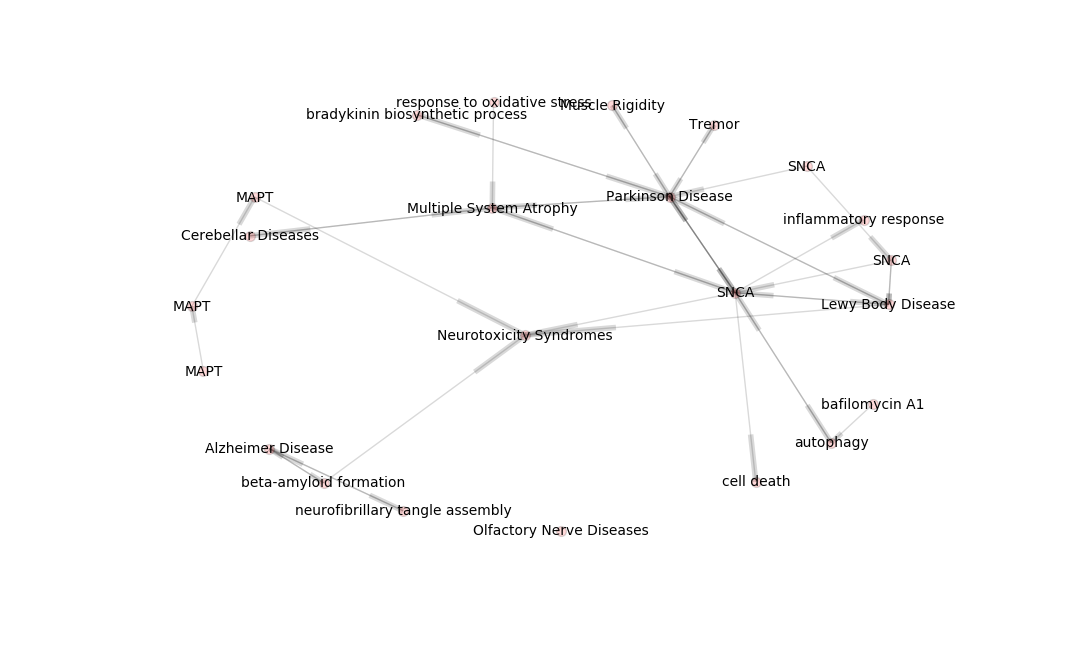

In [26]:
plt.figure(figsize=(10,6))

nx.draw_spring(g, 
               nodelist=nodes,
               labels={n: n[2] for n in g},
               k=4/math.sqrt(len(g)),
               iterations=100,
               node_size=50, 
               width=1,  
               alpha=0.15,
               with_labels=True,
               font_size=10)

## Conclusions

The goal of the annotation of my 16 articles was to capture the novel publications about the prion-like spreading of lewy bodies, tau, and beta amyloid peptides. However, this network of spreading cannot be captured by BEL statements and should be instead be captured in a different directed network. These data can be later contextualized with BEL networks, which can allow for differential analysis of the active network within each of the regions. Further contextualization with causal molecular interactions can allow for integration with data, and ultimately allow this model to support further analysis.

## Source Data

In [38]:
cat bel_lab_results.bel

SET DOCUMENT Name = "Neuroinflammation and Prion Disease"
SET DOCUMENT Version = "1.0"    
SET DOCUMENT Description = "This document contains the annotations for putative relations between prion diseases and AD/PD"
SET DOCUMENT Copyright = "Copyright (c) 2016 Charles Tapley Hoyt"
SET DOCUMENT Authors = "Charles Tapley Hoyt"
SET DOCUMENT Licenses = "Proprietary. This document may not be modified or distributed under any circumstances, and may not used outside of the context of assigning a grade for the Introduction to Systems Biology Modeling Lab 2016 at B-IT."
SET DOCUMENT ContactInfo = "cthoyt@gmail.com"

# NAMESPACE URLS

DEFINE NAMESPACE ADO		AS URL "http://belief.scai.fraunhofer.de/openbel/repository/namespaces/ADO.belns"
DEFINE NAMESPACE AFFX 		AS URL "http://resource.belframework.org/belframework/20150611/namespace/affy-probeset-ids.belns"
DEFINE NAMESPACE BRCO 		AS URL "http://belief.scai.fraunhofer.de/openbel/repository/namespaces/BRCO.belns"
DEFINE NAMESPACE CHEBI 		AS URL "ht